# RNN training a random function (exponential decay tested) on CPU

References

https://medium.com/swlh/introduction-to-recurrent-neural-networks-rnns-347903dd8d81

https://gist.github.com/tims457/60d1b1688dfab3e02cbd9bbd83b49a66


In [1]:


import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

print(torch.cuda.is_available())


True


# Creating an RNN module from scratch

In [2]:
class RNNCell(nn.Module):
    
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(RNNCell, self).__init__()
        self.Wx = torch.randn(hiddenSize, inputSize) # input weights
        self.Wh = torch.randn(hiddenSize, hiddenSize) # hidden weights
        #self.Wy = torch.randn(outputSize,recurhiddenSizerentSize) # output weights
        self.Wy = torch.randn(outputSize, hiddenSize) # output weights
        self.h = torch.zeros(hiddenSize,1) # initial hidden state
        self.bh = torch.zeros(hiddenSize,1) # hidden state bias
        self.by = torch.zeros(outputSize,1) # output bias
def forward(self, x):
        self.h = torch.tanh(self.bh + torch.matmul(self.Wx, x) + torch.matmul(self.Wh,self.h))
        output = nn.Softmax(self.by + torch.matmul(self.Wy,self.h))
        
        return output, self.h

## Using Pytorch RNN Module

In [3]:
class RNNData(Dataset):
    def __init__(self, X, sequenceLength):
        'Initialization'
        self.X = X
        self.sequenceLength = sequenceLength
    def __len__(self):
        'Denotes the total number of samples'
        return int(torch.floor(torch.tensor(len(self.X)/self.sequenceLength)))
    
    def __getitem__(self, index):
        sequence = self.X[index:index+self.sequenceLength]
        y = self.X[index+self.sequenceLength+1]
        return sequence, y

Text(0.5, 0, 'x')

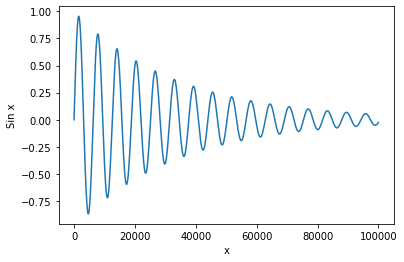

In [4]:
X = torch.sin(torch.linspace(0,100,100000))*torch.exp(-0.03*torch.linspace(0,100,100000))
plt.plot(X)
plt.ylabel('Sin x')
plt.xlabel('x')

In [5]:
#hyperparameters
batchSize = 100 
sequenceLength = 50
numLayers = 1
hiddenSize = 4
learningRate = 0.01
epochs = 100

In [7]:
data = RNNData(X,sequenceLength)
dataLoader = DataLoader(data, batch_size=batchSize, shuffle=True)
for x,y in dataLoader:
    print(x)
    print(y)
    break

tensor([[0.5141, 0.5150, 0.5158,  ..., 0.5522, 0.5530, 0.5538],
        [0.8828, 0.8824, 0.8821,  ..., 0.8649, 0.8645, 0.8641],
        [0.9262, 0.9260, 0.9257,  ..., 0.9144, 0.9141, 0.9139],
        ...,
        [0.4706, 0.4714, 0.4723,  ..., 0.5100, 0.5108, 0.5117],
        [0.8166, 0.8171, 0.8176,  ..., 0.8392, 0.8396, 0.8401],
        [0.9513, 0.9514, 0.9514,  ..., 0.9539, 0.9539, 0.9539]])
tensor([0.5554, 0.8633, 0.9133, 0.6686, 0.8598, 0.2863, 0.8551, 0.5084, 0.9016,
        0.9403, 0.2929, 0.9479, 0.8777, 0.2245, 0.8886, 0.9509, 0.5609, 0.9540,
        0.1664, 0.8245, 0.5182, 0.9544, 0.1321, 0.9522, 0.2712, 0.9248, 0.6931,
        0.9472, 0.8918, 0.7217, 0.8023, 0.7601, 0.9357, 0.9102, 0.2235, 0.9521,
        0.9047, 0.9513, 0.3097, 0.9537, 0.6850, 0.6843, 0.8874, 0.8890, 0.8735,
        0.3585, 0.9302, 0.3060, 0.2740, 0.3866, 0.0529, 0.8811, 0.7986, 0.9542,
        0.2331, 0.6272, 0.3402, 0.9066, 0.6964, 0.8855, 0.5727, 0.8795, 0.0787,
        0.1242, 0.9232, 0.4984, 0.0718, 0.

In [8]:
# create our RNN based network with an RNN followed by a linear layer
class RNN(nn.Module):
    def __init__(self, inputSize, hiddenSize, numLayers):
        super().__init__()
        self.RNN = nn.RNN(input_size=inputSize, 
                          hidden_size=hiddenSize, 
                          num_layers=numLayers, 
                          nonlinearity='tanh', 
                          batch_first=True) #inputs and outputs are  (batch, seq, feature)
        self.linear = nn.Linear(hiddenSize,1)
        
    def forward(self,x,hState):
        x, h = self.RNN(x,hState)
        out = self.linear(x[:,-1,:]) # gets last output
        return out
# create our network instance, pick loss function and optimizer
model = RNN(1,hiddenSize,numLayers)
model
lossFn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

# Test model output

In [9]:
ytest = model(torch.randn(batchSize,sequenceLength,1),torch.zeros([numLayers, batchSize, hiddenSize]))
ytest.shape

torch.Size([100, 1])

# Training model

1.520400047302246
0.8967272043228149
0.4942762851715088
0.053259942680597305
0.007172411773353815
0.0022163265384733677
0.0014082257403060794
0.0012183611979708076
0.0010733461240306497
0.000961718731559813
0.0008989035850390792
0.0008098318940028548
0.0007666161982342601
0.0007099528447724879
0.0006728677544742823
0.0006372089846991003
0.0005887409206479788
0.0005548818153329194
0.0005470524774864316
0.0005319496267475188
0.0005399462534114718
0.0004730307846330106
0.00042863647104240954
0.00042866842704825103
0.00040418689604848623
0.00038015664904378355
0.0003532895934768021
0.0003272303438279778
0.00031088502146303654
0.00028873668634332716
0.00030409812461584806
0.00026993188657797873
0.0002679474710021168
0.0002551244688220322
0.00023666734341531992
0.00021905158064328134
0.00021039304556325078
0.00019362792954780161
0.00021709002612624317
0.00021635429584421217
0.00021137745352461934
0.0001631512277526781
0.00018059936701320112
0.00015580645413137972
0.00014616278349421918
0.000

Text(0, 0.5, 'Loss')

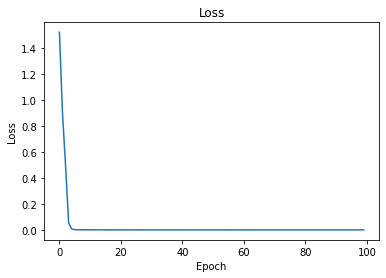

In [10]:
model.train()
lossHistory = []
for epoch in range(epochs):
    lossTotal = 0
    for x,y in dataLoader:
        x, y = x, y
        hState = torch.zeros([numLayers, batchSize, hiddenSize])
        yhat= model(x.reshape([batchSize,sequenceLength, 1]),hState)
        
        loss = lossFn(yhat.view(-1),y)
        
        model.zero_grad()
        loss.backward()
        optimizer.step()
        
        lossTotal +=loss
    lossHistory.append(lossTotal.detach().numpy())
    #https://stackoverflow.com/questions/63582590/why-do-we-call-detach-before-calling-numpy-on-a-pytorch-tensor
    print(lossTotal.item())
        
plt.plot(lossHistory)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [33]:
model.eval()
model(X[0:sequenceLength].reshape(1,sequenceLength,1),torch.zeros([numLayers, 1, hiddenSize]))



tensor([[0.0539]], grad_fn=<AddmmBackward0>)

# Test model

Text(0, 0.5, 'Sin(x)')

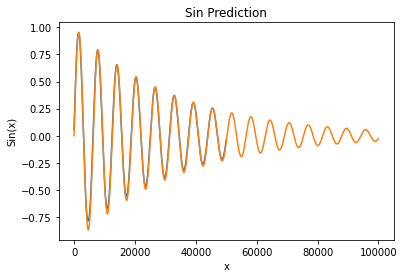

In [34]:
import numpy as np
iterations = 50000

yData = np.zeros([iterations, 1],np.float64)
yDataSinModel = np.zeros([iterations, 1],np.float64)
for i in range(iterations):

    yData[i] = model(X[i:i+sequenceLength].reshape(1,sequenceLength,1),torch.zeros([numLayers, 1, hiddenSize])).detach().numpy()[0] #CPU or GPU compatible

    yDataSinModel[i] = np.sin(i)
#print(yData)
#print(len(yData))
print
plt.plot(yData)
plt.plot(X)
plt.title('Sin Prediction')
plt.xlabel('x')
plt.ylabel('Sin(x)')

In [44]:
print(np.shape(yData))

(50000, 1)


Text(0, 0.5, 'Sin(x)')

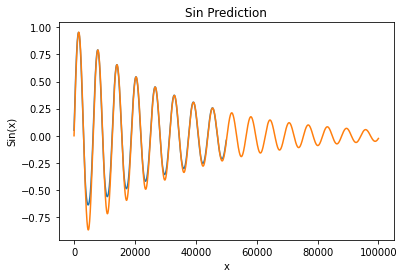

In [11]:
import numpy as np

iterations = 50000

yDataTensor = torch.zeros(iterations)
yDataSinModel = np.zeros([iterations, 1],np.float64)
hL = torch.zeros([numLayers, 1, hiddenSize])
for i in range(iterations):
    yDataTensor[i] = model(X[i:i+sequenceLength].reshape(1,sequenceLength,1),hL).detach()[0]
    yDataSinModel[i] = np.sin(i)

yData = yDataTensor.numpy()
print
plt.plot(yData)
plt.plot(X)
plt.title('Sin Prediction')
plt.xlabel('x')
plt.ylabel('Sin(x)')

# Another example to try 
https://www.cpuheater.com/deep-learning/introduction-to-recurrent-neural-networks-in-pytorch/
https://github.com/cpuheater/pytorch_examples

https://towardsdatascience.com/building-rnn-lstm-and-gru-for-time-series-using-pytorch-a46e5b094e7b